In [10]:
import osmnx as ox

center_point = (53.211967, 50.177502) # Samara
G = ox.graph_from_point(center_point, dist = 15000, retain_all = True, simplify = True, network_type = 'all')

In [11]:
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in G.edges(keys = True, data = True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)   

In [12]:
roadColors = []
roadWidths = []

for item in data:
    if "length" in item.keys():
        if item["length"] <= 100:
            linewidth = 0.10
            color = "#a6a6a6" 
            
        elif item["length"] > 100 and item["length"] <= 200:
            linewidth = 0.2
            color = "#676767"
            
        elif item["length"] > 200 and item["length"] <= 400:
            linewidth = 0.3
            color = "#454545"
            
        elif item["length"] > 400 and item["length"] <= 800:
            color = "#bdbdbd"
            linewidth = 0.4
        else:
            color = "#d5d5d5"
            linewidth = 0.6

        if "primary" in item["highway"]:
            linewidth = 0.7
            color = "#ffff"
    else:
        color = "#a6a6a6"
        linewidth = 0.10
            
    roadColors.append(color)
    roadWidths.append(linewidth)

In [13]:
for item in data:
    if "footway" in item["highway"]:
        color = "#ededed"
        linewidth = 0.15
    else:
        color = "#a6a6a6"
        linewidth = 0.5
        
    roadWidths.append(linewidth)

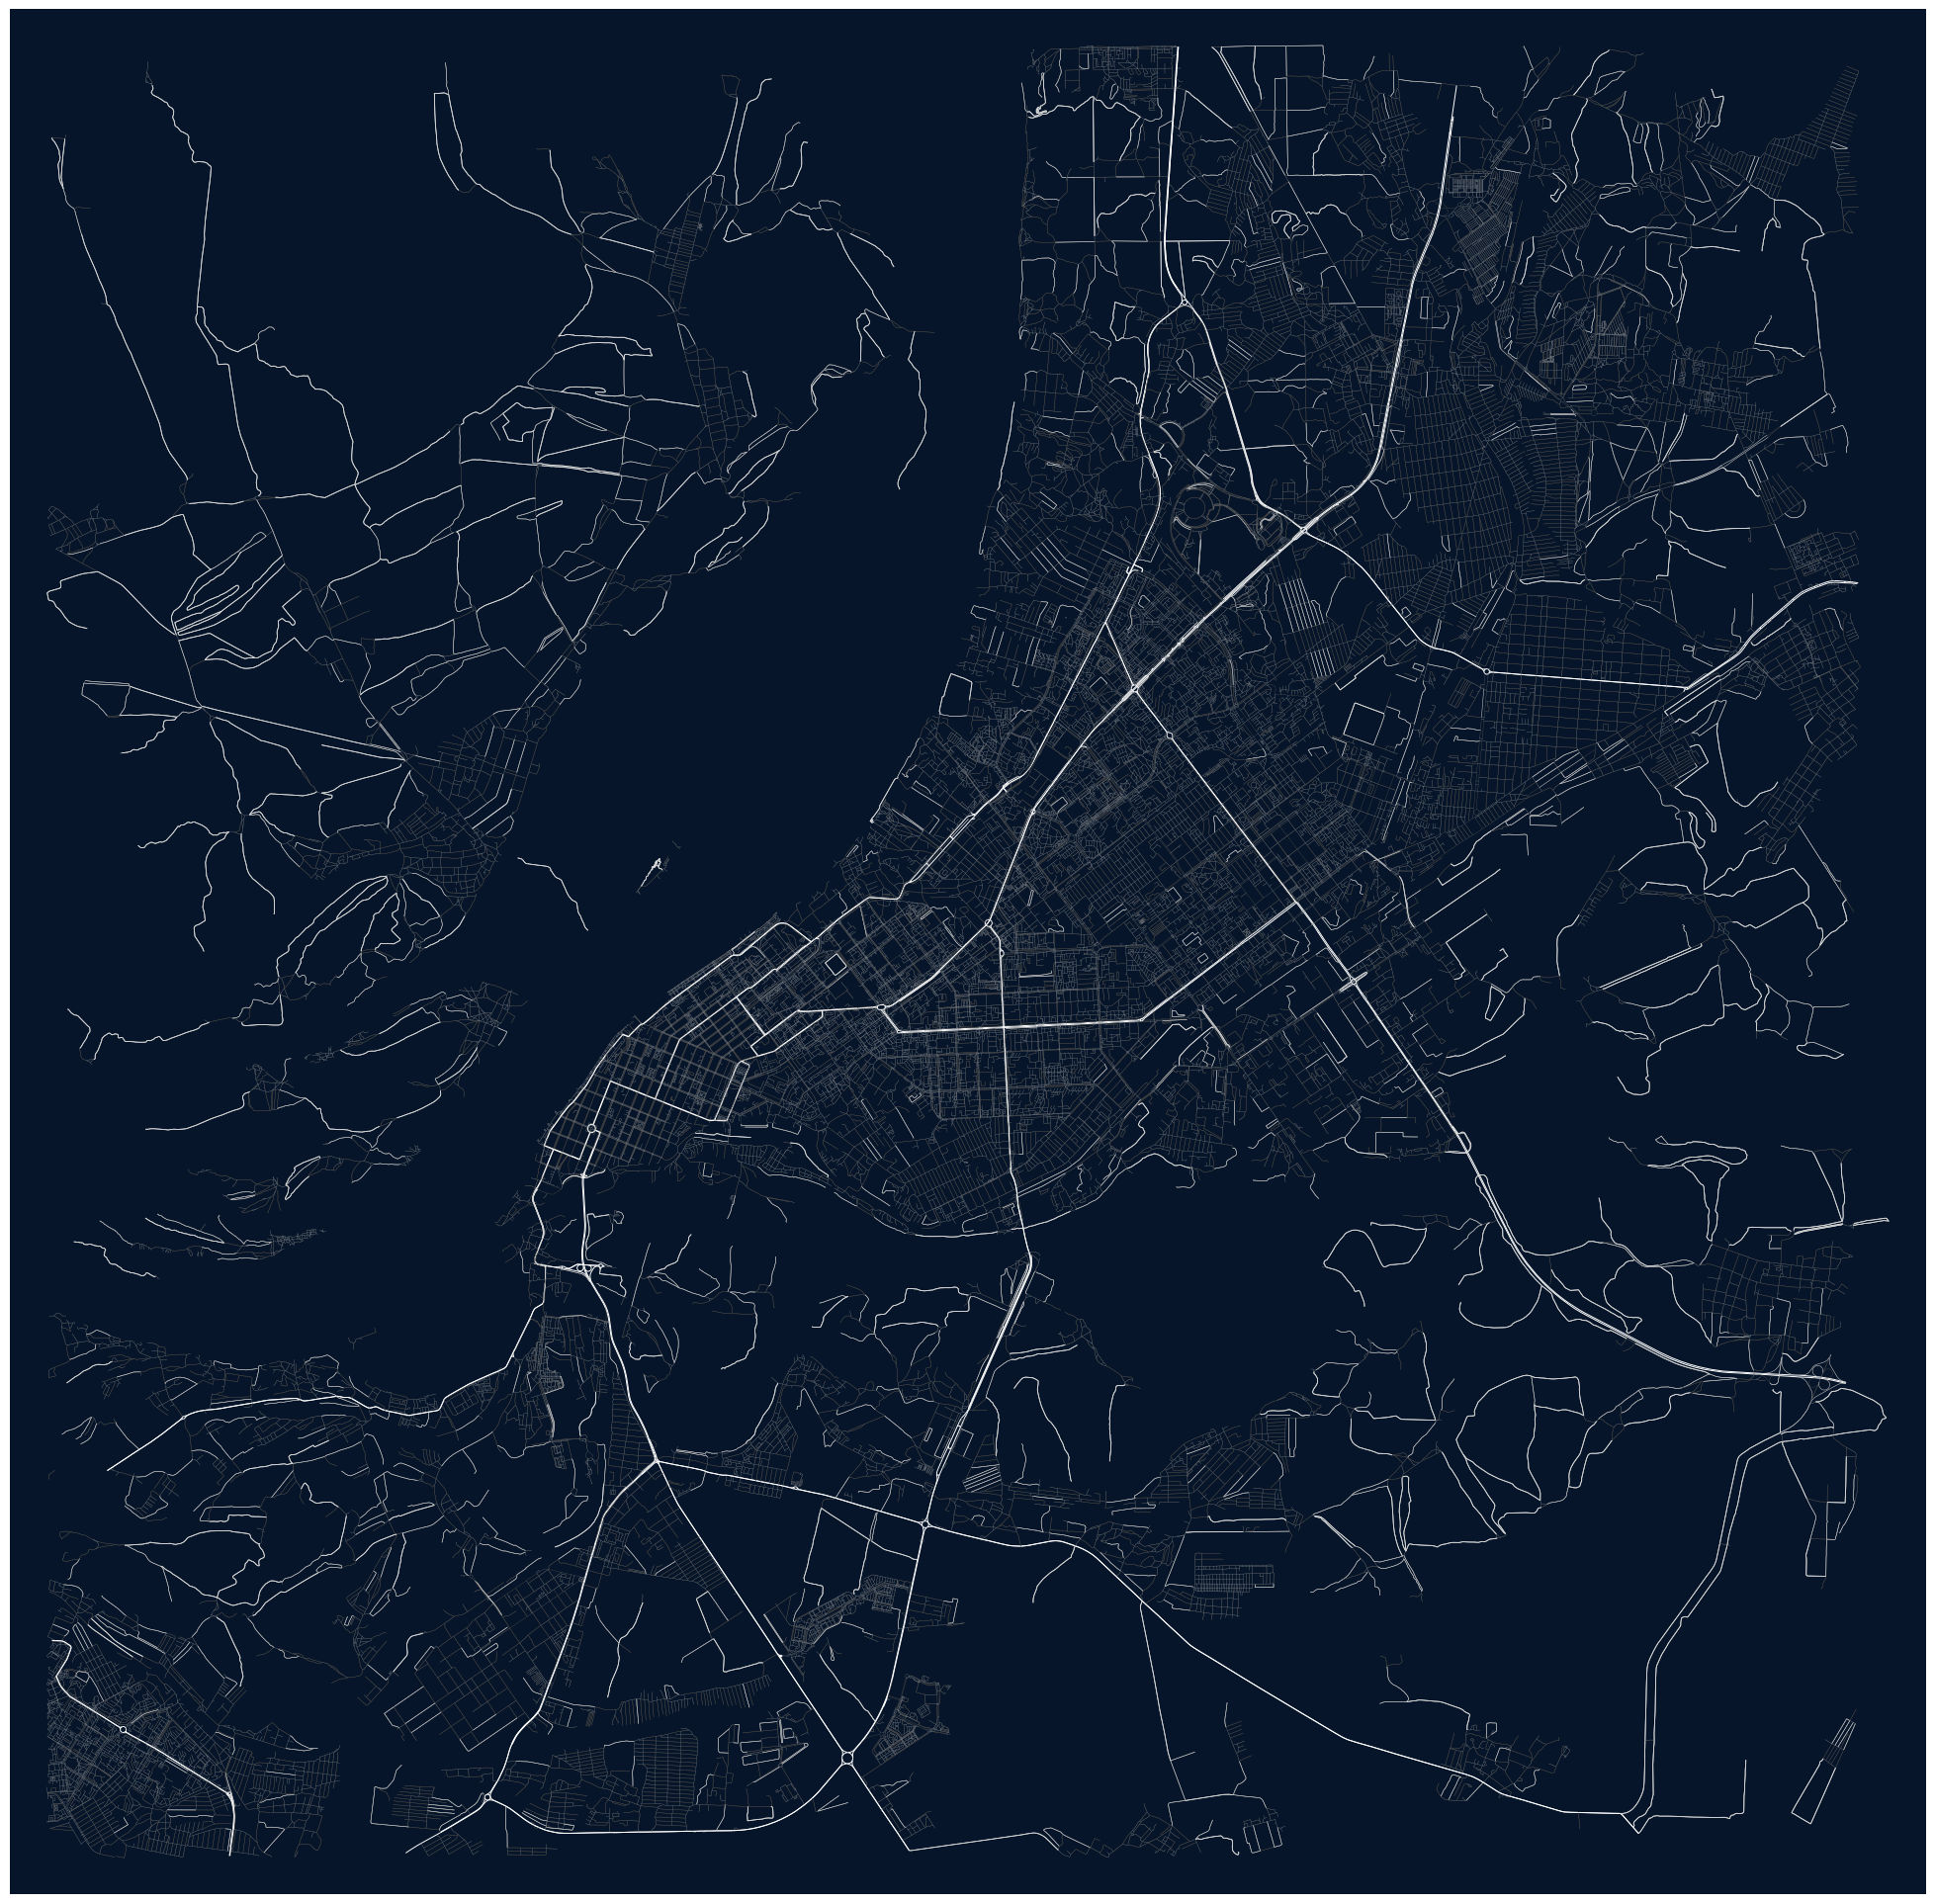

In [14]:
#Center of the map  
latitude = 53.211967 
longitude = 50.177502

#Limit borders 
# north = latitude + 0.15
# south = latitude - 0.15
# east = longitude + 0.15
# west = longitude - 0.15
# bbox = (north, south, east, west),
bgcolor = "#061529"

fig, ax = ox.plot_graph(G, node_size = 0, figsize = (25,40), 
                        dpi = 300,bgcolor = bgcolor,
                        save = False, edge_color = roadColors,
                        edge_linewidth = roadWidths, edge_alpha = 1)

fig.tight_layout(pad = 0)
fig.savefig("Samara.png", dpi = 300, bbox_inches = 'tight', format = 'png', 
            facecolor = fig.get_facecolor(), transparent = False)

f:\AllWorks\Python3107\lib\site-packages\osmnx\graph.py:488: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  warnings.warn(msg)
f:\AllWorks\Python3107\lib\site-packages\osmnx\graph.py:488: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  warnings.warn(msg)


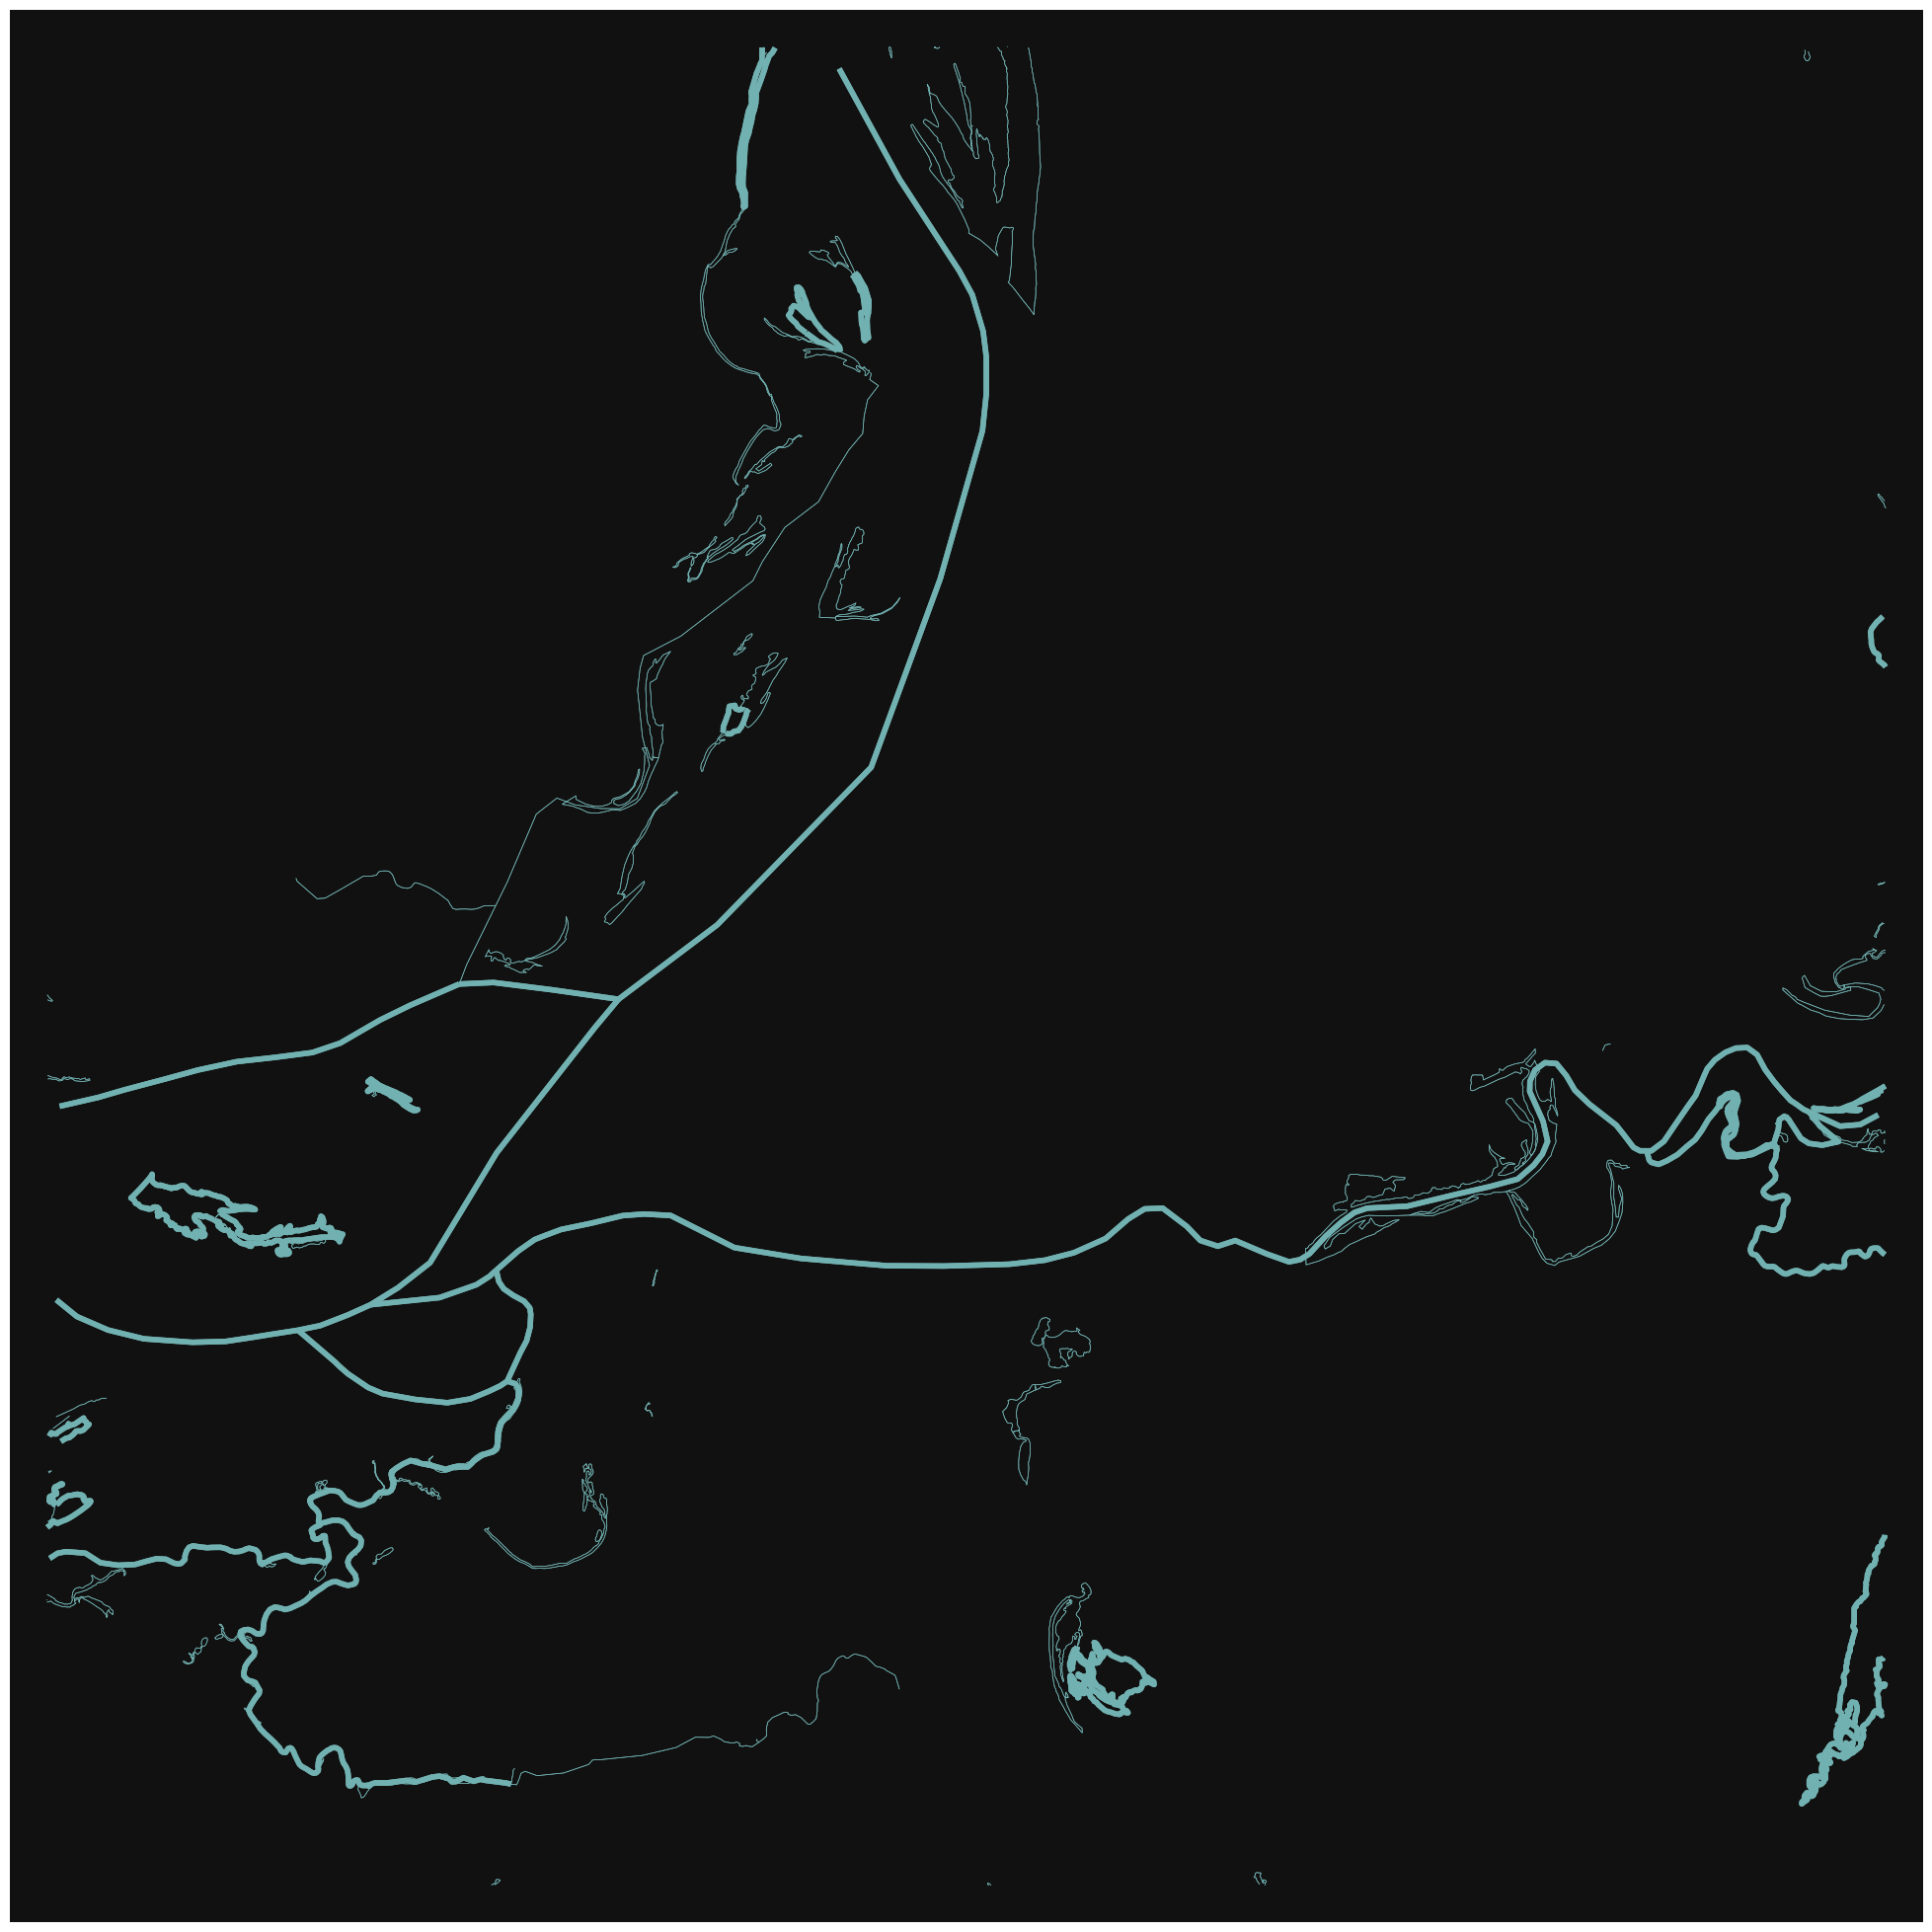

In [15]:
import networkx as nx
import osmnx as ox


center_point = (53.211967, 50.177502) 

G1 = ox.graph_from_point(center_point, dist = 15000, dist_type = 'bbox', network_type = 'all', 
                        simplify = True, retain_all = True, truncate_by_edge = False, clean_periphery = False, custom_filter = '["natural"~"water"]')
G2 = ox.graph_from_point(center_point, dist = 15000, dist_type = 'bbox', network_type = 'all', 
                        simplify = True, retain_all = True, truncate_by_edge = False, clean_periphery = False, custom_filter = '["waterway"~"river"]')
Gwater = nx.compose(G1, G2)


u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in Gwater.edges(keys = True, data = True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    


# List to store colors
roadColors = []
roadWidths = []

# #72b1b1
# #5dc1b9
for item in data:
    if "name" in item.keys():
        if item["length"] > 400: 
            color = "#72b1b1"
            linewidth = 4
        else:
            color = "#72b1b1"
            linewidth = 0.5
    else:
        color = "#72b1b1"
        linewidth = 0.5
    roadColors.append(color)    
    roadWidths.append(linewidth)



fig, ax = ox.plot_graph(Gwater, node_size = 0, figsize = (25, 40),  
                        dpi = 300, save = False, edge_color = roadColors,
                        edge_linewidth = roadWidths, edge_alpha = 1)

fig.tight_layout(pad = 0)
fig.savefig("waterSamara.png", dpi = 300, bbox_inches = 'tight', format = "png", 
            facecolor = fig.get_facecolor(), transparent = True)